Confusion Matrix:
[[1 1]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



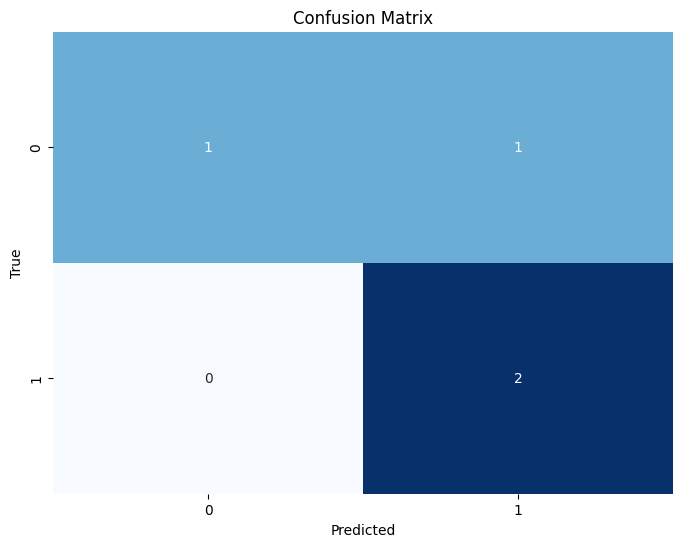

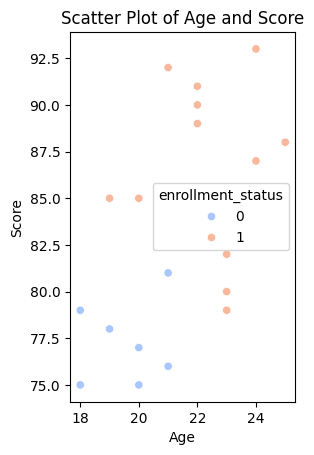

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Sample data with 20 records
data = """student_id,age,gender,score,other_features,enrollment_status
1,20,M,85,Participated in Clubs and Activities,1
2,22,F,90,Volunteered for Community Service,1
3,19,M,78,Member of Sports Team,0
4,21,F,92,Received Academic Awards,1
5,23,M,80,Participated in Clubs and Activities,1
6,25,F,88,Participated in Research Projects,1
7,20,M,75,Member of Music Band,0
8,24,F,87,Volunteered for Community Service,1
9,23,M,82,Received Academic Awards,1
10,18,F,79,Participated in Sports,0
11,22,M,89,Participated in Research Projects,1
12,21,F,76,Member of Debate Team,0
13,24,M,93,Received Academic Awards,1
14,19,F,85,Participated in Clubs and Activities,1
15,20,M,77,Participated in Sports,0
16,22,F,91,Volunteered for Community Service,1
17,23,M,79,Participated in Clubs and Activities,1
18,25,F,88,Received Academic Awards,1
19,21,M,81,Member of Music Band,0
20,18,F,75,Participated in Sports,0"""

# Create a DataFrame
df = pd.read_csv(io.StringIO(data))

# Identify the target variable and features
X = df[['age', 'gender', 'score', 'other_features']]
y = df['enrollment_status']  # Binary: 1 for enrolled, 0 for not enrolled

# Preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'score']),
        ('cat', OneHotEncoder(), ['gender', 'other_features'])
    ])

# Split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Convert the transformed data back to a DataFrame
X_train_transformed = preprocessor.fit_transform(X_train)
X_train_columns = ['age', 'score'] + list(preprocessor.named_transformers_['cat'].get_feature_names_out(['gender', 'other_features']))
X_train = pd.DataFrame(X_train_transformed, columns=X_train_columns)

X_test_transformed = preprocessor.transform(X_test)
X_test_columns = ['age', 'score'] + list(preprocessor.named_transformers_['cat'].get_feature_names_out(['gender', 'other_features']))
X_test = pd.DataFrame(X_test_transformed, columns=X_test_columns)

# Train the model
classifier = RandomForestClassifier(n_estimators=200, random_state=0)
classifier.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = classifier.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the Confusion Matrix using seaborn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Scatter plot for visualization
plt.subplot(1, 2, 2)
sns.scatterplot(x='age', y='score', hue='enrollment_status', data=df, palette='coolwarm')
plt.title('Scatter Plot of Age and Score')
plt.xlabel('Age')
plt.ylabel('Score')

# Save the model for future use
joblib.dump(classifier, 'enrollment_model.pkl')

# Optional: Load the model later if needed
loaded_model = joblib.load('enrollment_model.pkl')
